Get started with Dataset

In [33]:
# ALL INCLUDES

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

import os

In [2]:
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

In [3]:
DATASET_PATH = "UCI HAR Dataset/"
TRAIN = "train/"
TEST = "test/"

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, "r")
        X_signals.append(
            [np.array(series, dtype=np.float32) for series in [
                row.replace('  ', ' ').strip().split(' ') for row in file 
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
    DATASET_PATH + DATASET_PATH + TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]

X_test_signals_paths = [
    DATASET_PATH + DATASET_PATH + TEST + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


def load_y(y_path):
    file = open(y_path, "r")
    
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.float32
    )
    
    file.close()
    
    return y_ - 1

y_train_path = DATASET_PATH + DATASET_PATH + TRAIN + "y_train.txt"
y_test_path = DATASET_PATH + DATASET_PATH + TEST + "y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [4]:
# Understanding the DataSet

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (7352, 128, 9), y_train shape: (7352, 1)
X_test shape: (2947, 128, 9), y_test shape: (2947, 1)


traiing with ML algo

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

# we normalize the features, which is important for distance based algorithms

X_train_reshaped = X_train_copy.reshape(-1, X_train.shape[2])
X_test_reshaped = X_test_copy.reshape(-1, X_test.shape[2])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

X_train = X_train_scaled.reshape(7352, 128, 9)
X_test = X_test_scaled.reshape(2947, 128, 9)

X_train_flat = X_train.reshape(7352, -1)
X_test_flat = X_test.reshape(2947, -1)

y_train_copy = y_train_copy.ravel()
y_test_copy = y_test_copy.ravel()

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_flat, y_train_copy)


RandomForestClassifier(random_state=42)

Accuracy: 0.8463


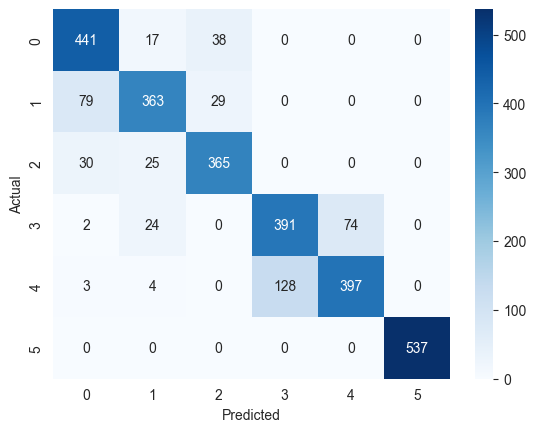

In [6]:
y_pred = clf.predict(X_test_flat)
accuracy = accuracy_score(y_test_copy, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test_copy, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training with SVM


In [13]:
from sklearn import svm

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()


# reshape each 128x9 input into 1D array
X_train_flat = X_train_copy.reshape(X_train_copy.shape[0], -1)
X_test_flat = X_test_copy.reshape(X_test_copy.shape[0], -1)

scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

y_train_copy = y_train_copy.ravel()
y_test_copy = y_test_copy.ravel()

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train_flat, y_train_copy)

SVC()

In [14]:
y_pred = svm_model.predict(X_test_flat)

svm_accuracy = accuracy_score(y_test_copy, y_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9013


### Training with LSTM

In [29]:
# setting up the parameters

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

training_data_count = len(X_train_copy)
test_data_count = len(X_test_copy)
n_steps = len(X_train[0])
n_input = len(X_train[0][0])

# LSTM architecture
n_hidden = 32 # hidden layers
n_classes = 6 # total classes



# Some debugging info

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(X_test.shape, y_test.shape, np.mean(X_test_copy), np.std(X_test_copy))
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")

Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(2947, 128, 9) (2947, 1) -0.007153686 0.95341825
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# If y_train is not one-hot encoded, convert it to one-hot encoding (for categorical_crossentropy loss)
y_train_one_hot = to_categorical(y_train, num_classes=6)  # 6 classes in your problem

# Standardize your input data (X_train)
scaler = StandardScaler()
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the input data (if needed)
X_train_scaled = scaler.fit_transform(X_train_flat)  # Standardize the features

# Split the data into training and validation sets
X_train_scaled, X_val_scaled, y_train_one_hot, y_val_one_hot = train_test_split(X_train_scaled, y_train_one_hot, test_size=0.2, random_state=42)

# MLP model
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),  # Flattened input (features)
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 units
    layers.Dense(128, activation='relu'),  # Another hidden layer with 64 units
    layers.Dense(6, activation='softmax')  # Output layer with 6 classes (softmax for classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=10,  # Number of epochs
                    batch_size=1500,  # Batch size
                    validation_data=(X_val_scaled, y_val_one_hot))  # Validate on the validation set

# Evaluate the model on the test data (if you have a test set)
# X_test_scaled, y_test_one_hot = (your test data here)
# test_loss, test_acc = model.evaluate(X_test_scaled, y_test_one_hot)
# print("Test accuracy:", test_acc)

# Make predictions on the validation set
y_pred = model.predict(X_val_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# If you want to see the accuracy on the validation set
from sklearn.metrics import accuracy_score
val_acc = accuracy_score(np.argmax(y_val_one_hot, axis=1), y_pred_classes)
print(f"Validation Accuracy: {val_acc}")


Epoch 1/10


/Users/notvisal/Desktop/coding sesh/Intern/HAR-test/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3332 - loss: 1.6921 - val_accuracy: 0.6499 - val_loss: 1.0415
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7193 - loss: 0.9180 - val_accuracy: 0.8008 - val_loss: 0.7168
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8669 - loss: 0.5876 - val_accuracy: 0.8640 - val_loss: 0.5009
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9015 - loss: 0.3926 - val_accuracy: 0.8906 - val_loss: 0.3541
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9222 - loss: 0.2729 - val_accuracy: 0.9069 - val_loss: 0.2865
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9309 - loss: 0.2174 - val_accuracy: 0.9116 - val_loss: 0.2435
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9412 - loss: 0.1759 - val_accuracy: 0.9211 - val_loss: 0.2166
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9485 - loss: 0.1527 - val_accuracy: 0.9225 - val_loss: 0.1954
Epoch 9/10


In [48]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

# one hot encode
y_train_one_hot = to_categorical(y_train_copy, num_classes=6)
y_test_one_hot = to_categorical(y_test_copy, num_classes=6)

scaler = StandardScaler()

# Reshape each time-step separately for scaling (keeping samples & timesteps)
num_samples, time_steps, num_features = X_train_copy.shape

X_train_reshaped = X_train_copy.reshape(-1, num_features)  # Reshape for scaling
X_train_scaled = scaler.fit_transform(X_train_reshaped).reshape(num_samples, time_steps, num_features)

X_test_reshaped = X_test_copy.reshape(-1, num_features)  # Apply same scaling
X_test_scaled = scaler.transform(X_test_reshaped).reshape(X_test_copy.shape)


model = models.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    layers.LSTM(128, return_sequences=False),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# ✅ Define the missing callback class to print accuracy per epoch
class PrintEpochAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy', 0)
        val_acc = logs.get('val_accuracy', 0)
        print(f"Epoch {epoch + 1}: Train Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")
        

history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=10,
                    batch_size=1500,
                    validation_data=(X_test_scaled, y_test_one_hot),
                    callbacks=[PrintEpochAccuracy()])
                    
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

LSTM_acc = accuracy_score(np.argmax(y_test_one_hot, axis=1), y_pred_classes)
print(f"LSTM Accuracy: {LSTM_acc}")

Epoch 1/10


/Users/notvisal/Desktop/coding sesh/Intern/HAR-test/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2318 - loss: 1.7514Epoch 1: Train Accuracy = 0.3164, Validation Accuracy = 0.3784
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.2459 - loss: 1.7332 - val_accuracy: 0.3784 - val_loss: 1.3961
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4188 - loss: 1.3227Epoch 2: Train Accuracy = 0.4538, Validation Accuracy = 0.5467
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.4246 - loss: 1.3155 - val_accuracy: 0.5467 - val_loss: 1.2213
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6038 - loss: 1.1051Epoch 3: Train Accuracy = 0.6119, Validation Accuracy = 0.5765
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.6052 - loss: 1.0994 - val_accuracy: 0.5765 - val_loss: 1.0422
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6686 - loss: 0.8870Epoch 4: Train Accuracy = 0.6895, Validation Accuracy = 0.6800
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.6721 - loss: 0.8791 - val_accuracy: 0.6800 - val_